In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("Heart_Disease.csv")

In [12]:
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


# Data Preparation

In [14]:
df=df.rename(columns={"63":"Age","1":"Sex","4":"cp","140":"trestbps","260":"chol","0":"fbs","1.1":"restecg","112":"thalach","1.2":"exang","3":"oldpeak","2":"slope","?":"ca","?.1":"thal","2.1":"the predicted attribute"})

In [15]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [16]:
df.columns

Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'the predicted attribute'],
      dtype='object')

In [17]:
df.isnull().sum()

Age                        0
Sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
ca                         0
thal                       0
the predicted attribute    0
dtype: int64

There is no missing data in data set

In [47]:
df.dtypes

Age                         int64
Sex                         int64
cp                          int64
trestbps                   object
chol                       object
fbs                        object
restecg                     int64
thalach                    object
exang                      object
oldpeak                    object
slope                      object
ca                         object
thal                       object
the predicted attribute     int64
dtype: object

In [20]:
df.describe()

,Age,Sex,cp,restecg,the predicted attribute
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


# EDA

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

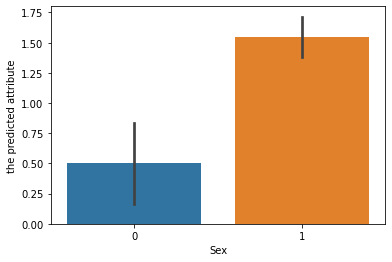

In [24]:
sns.barplot(x="Sex",y="the predicted attribute",data=df)

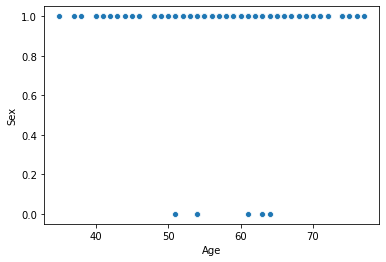

In [29]:
sns.scatterplot(x="Age",y="Sex",data=df)

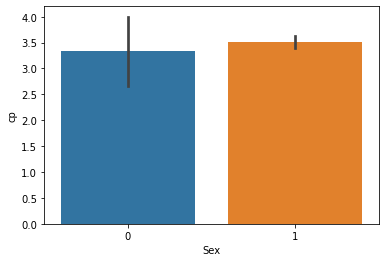

In [31]:
sns.barplot(x="Sex",y="cp",data=df)

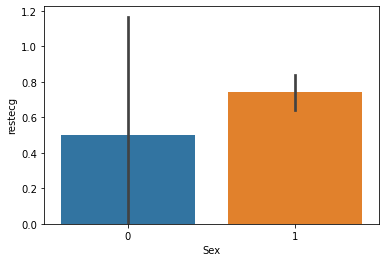

In [32]:
sns.barplot(x="Sex",y="restecg",data=df)

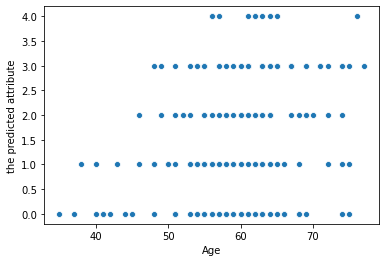

In [34]:
sns.scatterplot(x="Age",y="the predicted attribute",data=df)

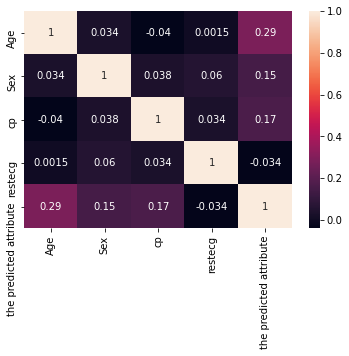

In [35]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# checking outliers

Age                           AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Sex                        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp                         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
restecg                    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
the predicted attribute    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
dtype: object

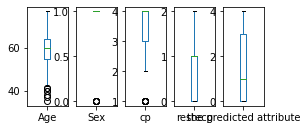

In [43]:
df.plot(kind="box",subplots=True,layout=(2,7))

In [44]:
df.skew()

Age                       -0.397178
Sex                       -5.537073
cp                        -1.641267
restecg                    0.396540
the predicted attribute    0.302681
dtype: float64

# Data Cleasing

In [48]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()
df["trestbps"]=le.fit_transform(df["trestbps"])

In [51]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,44,1,4,17,209,0,1,127,0,0,?,?,?,0
1,60,1,4,18,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,24,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,5,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,10,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,15,333,1,1,154,0,0,?,?,?,1
195,62,1,1,40,139,0,1,?,?,?,?,?,?,0
196,55,1,4,11,223,1,1,100,0,0,?,?,6,2
197,58,1,4,40,385,1,2,?,?,?,?,?,?,0


In [52]:
df["thalach"]=le.fit_transform(df["thalach"])

In [53]:
df["exang"]=le.fit_transform(df["exang"])

In [55]:
import numpy as np
df=df.replace("?",np.NaN)

In [56]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,44,1,4,17,209,0,1,21,0,0,NaN,NaN,NaN,0
1,60,1,4,18,218,0,1,30,1,1.5,3,NaN,NaN,2
2,55,1,4,24,228,0,1,35,1,2.5,1,NaN,NaN,1
3,66,1,3,5,213,1,2,58,1,1.3,2,NaN,NaN,0
4,66,1,3,10,0,0,1,14,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,15,333,1,1,38,0,0,NaN,NaN,NaN,1
195,62,1,1,40,139,0,1,59,2,NaN,NaN,NaN,NaN,0
196,55,1,4,11,223,1,1,0,0,0,NaN,NaN,6,2
197,58,1,4,40,385,1,2,59,2,NaN,NaN,NaN,NaN,0


In [59]:
df.drop(["oldpeak","slope","ca","thal"],axis=1,inplace=True)

In [60]:
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,the predicted attribute
0,44,1,4,17,209,0,1,21,0,0
1,60,1,4,18,218,0,1,30,1,2
2,55,1,4,24,228,0,1,35,1,1
3,66,1,3,5,213,1,2,58,1,0
4,66,1,3,10,0,0,1,14,0,0
...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,15,333,1,1,38,0,1
195,62,1,1,40,139,0,1,59,2,0
196,55,1,4,11,223,1,1,0,0,2
197,58,1,4,40,385,1,2,59,2,0


In [63]:
df.dtypes

Age                         int64
Sex                         int64
cp                          int64
trestbps                    int32
chol                       object
fbs                        object
restecg                     int64
thalach                     int32
exang                       int32
the predicted attribute     int64
dtype: object

In [66]:
df.drop(["chol","fbs"],axis=1,inplace=True)

# Removing Outlier

In [68]:
z=np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.60514582, 1.38362755,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.17127225, 0.00691814,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.06976861, 0.00691814,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 1.61751746, 1.38362755,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 1.22676478, 1.36979127,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.93751574, 0.00691814,
        0.42461322]])

In [69]:
threshold=3
print(np.where(z>3))

(array([ 50,  65,  71,  75,  78,  95,  96, 125, 127, 130, 132, 136, 189,
       194, 195], dtype=int32), array([1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2], dtype=int32))


In [70]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(184, 8)


In [71]:
df.shape

(199, 8)

In [72]:
df_new

,Age,Sex,cp,trestbps,restecg,thalach,exang,the predicted attribute
0,44,1,4,17,1,21,0,0
1,60,1,4,18,1,30,1,2
2,55,1,4,24,1,35,1,1
3,66,1,3,5,2,58,1,0
4,66,1,3,10,1,14,0,0
...,...,...,...,...,...,...,...,...
192,62,1,4,32,1,29,1,1
193,46,1,4,19,0,20,0,2
196,55,1,4,11,1,0,0,2
197,58,1,4,40,2,59,2,0


In [73]:
Percent_loss=(199-184)/199*100

In [74]:
Percent_loss

7.537688442211055

In [77]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# Transforing Data to remove skewness

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")
x

array([[-1.88085152,  0.        ,  0.67618707, ...,  0.51915547,
        -0.46036936, -1.43709646],
       [ 0.04248981,  0.        ,  0.67618707, ...,  0.51915547,
        -0.01823331,  0.04086665],
       [-0.60258355,  0.        ,  0.67618707, ...,  0.51915547,
         0.20763181,  0.04086665],
       ...,
       [-0.60258355,  0.        ,  0.67618707, ...,  0.51915547,
        -1.99349484, -1.43709646],
       [-0.22022494,  0.        ,  0.67618707, ...,  1.55695155,
         1.16795786,  1.35884118],
       [ 0.31138106,  0.        , -1.75460482, ...,  1.55695155,
         0.94297676,  0.04086665]])

# Transforing data to scaler

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [80]:
print(scaledx)

[[-1.88085152  0.          0.67618707 ...  0.51915547 -0.46036936
  -1.43709646]
 [ 0.04248981  0.          0.67618707 ...  0.51915547 -0.01823331
   0.04086665]
 [-0.60258355  0.          0.67618707 ...  0.51915547  0.20763181
   0.04086665]
 ...
 [-0.60258355  0.          0.67618707 ...  0.51915547 -1.99349484
  -1.43709646]
 [-0.22022494  0.          0.67618707 ...  1.55695155  1.16795786
   1.35884118]
 [ 0.31138106  0.         -1.75460482 ...  1.55695155  0.94297676
   0.04086665]]


# Now The Model for training and testing

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [92]:
for i in range(30,100):
        x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.30,random_state=i)
        mod=LogisticRegression()
        mod.fit(x_train,y_train)
        predmod=mod.predict(x_test)
        if round(accuracy_score(y_test,predmod)*100,1):
            
            print("At random_state=",i,"The model perform very well")
            print("At random_state=",i)
            print("Training r2_score is:",accuracy_score(y_test,predmod))

At random_state= 30 The model perform very well
At random_state= 30
Training r2_score is: 0.25
At random_state= 31 The model perform very well
At random_state= 31
Training r2_score is: 0.375
At random_state= 32 The model perform very well
At random_state= 32
Training r2_score is: 0.19642857142857142
At random_state= 33 The model perform very well
At random_state= 33
Training r2_score is: 0.23214285714285715
At random_state= 34 The model perform very well
At random_state= 34
Training r2_score is: 0.25
At random_state= 35 The model perform very well
At random_state= 35
Training r2_score is: 0.26785714285714285
At random_state= 36 The model perform very well
At random_state= 36
Training r2_score is: 0.35714285714285715
At random_state= 37 The model perform very well
At random_state= 37
Training r2_score is: 0.375
At random_state= 38 The model perform very well
At random_state= 38
Training r2_score is: 0.30357142857142855
At random_state= 39 The model perform very well
At random_state= 39


# Saving best model

In [89]:
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.30,random_state=42)

In [91]:
from sklearn.model_selection import cross_val_score

LogisticRegression

In [97]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
cvscore=cross_val_score(LogisticRegression(),x_train,y_train,cv=4).mean()
print("accuracy score:",accuracy_score(y_test,predlg))
print("confusion" "matrix:",confusion_matrix(y_test,predlg))
print("classification report:",classification_report(y_test,predlg))
print("cross val score:",(cvscore*100))

accuracy score: 0.2857142857142857
confusionmatrix: [[5 7 1 3 0]
 [3 8 1 4 0]
 [1 3 1 7 0]
 [1 5 1 2 0]
 [0 1 2 0 0]]
classification report:               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.33      0.50      0.40        16
           2       0.17      0.08      0.11        12
           3       0.12      0.22      0.16         9
           4       0.00      0.00      0.00         3

    accuracy                           0.29        56
   macro avg       0.23      0.22      0.21        56
weighted avg       0.29      0.29      0.27        56

cross val score: 28.90625


DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=4).mean()
print("accuracy score:",accuracy_score(y_test,predtc))
print("confusion matrix:",confusion_matrix(y_test,predtc))
print("classification report:",classification_report(y_test,predtc))
print("cross val score:",(cvscore*100))

accuracy score: 0.23214285714285715
confusion matrix: [[5 3 4 4 0]
 [6 4 4 2 0]
 [2 2 2 4 2]
 [2 2 1 2 2]
 [0 3 0 0 0]]
classification report:               precision    recall  f1-score   support

           0       0.33      0.31      0.32        16
           1       0.29      0.25      0.27        16
           2       0.18      0.17      0.17        12
           3       0.17      0.22      0.19         9
           4       0.00      0.00      0.00         3

    accuracy                           0.23        56
   macro avg       0.19      0.19      0.19        56
weighted avg       0.24      0.23      0.24        56

cross val score: 22.65625


SVR

In [100]:
from sklearn.svm import SVC

In [102]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=4).mean()
print("Accuracy score:",accuracy_score(y_test,predsvc))
print("Confusion matrix:",confusion_matrix(y_test,predsvc))
print("Classification_report:",classification_report(y_test,predsvc))
print("cross val score:",(cvscore*100))

Accuracy score: 0.3392857142857143
Confusion matrix: [[6 5 1 4 0]
 [6 6 1 3 0]
 [2 2 3 5 0]
 [0 5 0 4 0]
 [1 1 0 1 0]]
Classification_report:               precision    recall  f1-score   support

           0       0.40      0.38      0.39        16
           1       0.32      0.38      0.34        16
           2       0.60      0.25      0.35        12
           3       0.24      0.44      0.31         9
           4       0.00      0.00      0.00         3

    accuracy                           0.34        56
   macro avg       0.31      0.29      0.28        56
weighted avg       0.37      0.34      0.33        56

cross val score: 33.59375


Adaboostclassifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
cvscore=cross_val_score(AdaBoostClassifier(),x_train,y_train,cv=4).mean()
print("Accuracy score:",accuracy_score(y_test,predad))
print("Confusion matrix:",confusion_matrix(y_test,predad))
print("Classification report:",classification_report(y_test,predad))
print("cross val score:",(cvscore*100))

Accuracy score: 0.21428571428571427
Confusion matrix: [[8 4 2 2 0]
 [9 2 0 3 2]
 [3 3 1 4 1]
 [1 3 4 1 0]
 [1 1 1 0 0]]
Classification report:               precision    recall  f1-score   support

           0       0.36      0.50      0.42        16
           1       0.15      0.12      0.14        16
           2       0.12      0.08      0.10        12
           3       0.10      0.11      0.11         9
           4       0.00      0.00      0.00         3

    accuracy                           0.21        56
   macro avg       0.15      0.16      0.15        56
weighted avg       0.19      0.21      0.20        56

cross val score: 19.53125


randomforestclassifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
predrc=rc.predict(x_test)
cvscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=4).mean()
print("Accuracy score:",accuracy_score(y_test,predrc))
print("Confusion_matrix:",confusion_matrix(y_test,predrc))
print("Classification_report:",classification_report(y_test,predrc))
print("cross val score:",(cvscore*100))

Accuracy score: 0.3392857142857143
Confusion_matrix: [[6 4 4 2 0]
 [4 7 3 2 0]
 [1 2 2 6 1]
 [0 4 1 4 0]
 [1 1 0 1 0]]
Classification_report:               precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.39      0.44      0.41        16
           2       0.20      0.17      0.18        12
           3       0.27      0.44      0.33         9
           4       0.00      0.00      0.00         3

    accuracy                           0.34        56
   macro avg       0.27      0.28      0.27        56
weighted avg       0.34      0.34      0.33        56

cross val score: 29.6875


svc is performing well we need more data to get accuracy good with score 33% and cross val score 33.59 

# conclusion:

In [115]:
a=np.array(y_test)
predicted=np.array(svc.predict(x_test))
df_con=pd.DataFrame({"origianl":a,"Predicted":predicted},index=range(len(a)))

In [116]:
df_con

,origianl,Predicted
0,3,3
1,1,0
2,1,0
3,3,3
4,0,1
5,0,1
6,2,1
7,2,3
8,0,0
9,2,2


In [117]:
import pickle

In [118]:
filename="Heart_disease.pkl"
pickle.dump(svc,open(filename,"wb"))